In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
%matplotlib inline

import math
import warnings

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [16]:
n = 10000
p = 10

X = np.random.normal(size=n*p).reshape((n,p))

y = X[:,0] + 2 * X[:,1] + np.random.normal(size=n*1) +2

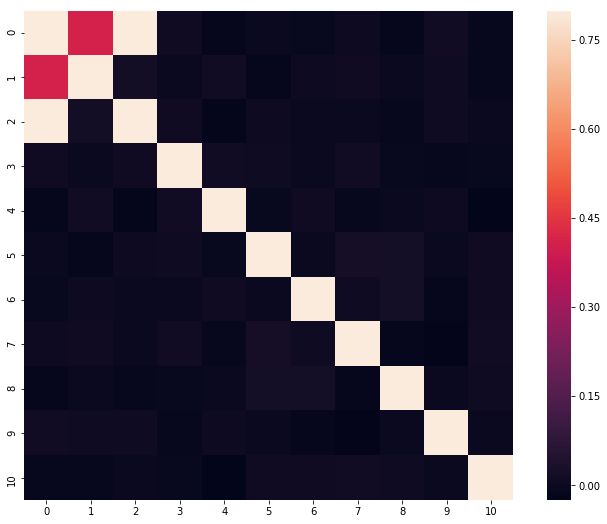

In [17]:
f, ax = plt.subplots(figsize=(12,9))
corrmat = pd.DataFrame(np.insert(X,0,y,axis=1)).corr()
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

R-squared regression: 0.8319554159852767
R-squared PLSR: 0.8319554159852766


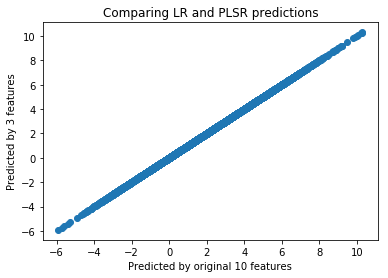

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X,y))

pls1 = PLSRegression(n_components = 5)

pls1.fit(X,y)

Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X,y))

plt.scatter(Y_pred,Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()